# Data description
Each observation is a 30m x 30m patch
- Elevation - Elevation in meters
- Aspect - Aspect in degrees azimuth
- Slope - Slope in degrees
- Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features
- Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features
- Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway
- Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice
- Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice
- Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice
- Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points
- Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation
- Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation
- Cover_Type (7 types, integers 1 to 7) - Forest Cover Type designation

In [1]:
# Import pandas
#!pip3 install --upgrade pandas
import pandas
pandas.__version__

'1.2.4'

In [2]:
# Read in data
train_df = pandas.read_csv('./data/train.csv')
print("Shape is:", train_df.shape)
print("Columns are:", train_df.columns)

Shape is: (15120, 56)
Columns are: Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', '

In [3]:
# Add new columns of categorical vars
train_df['Wilderness_Area'] = train_df.filter(regex=r'Wilderness_Area*').idxmax(axis=1)
train_df['Soil_Type'] = train_df.filter(regex=r'Soil_Type*').idxmax(axis=1)

In [4]:
# Describe non-soil type columns
train_df.filter(regex=r'^(?!Soil_Type)').describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,1511.147288,0.237897,0.033003,0.419907,0.309193,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,1099.936493,0.425810,0.178649,0.493560,0.462176,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,730.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,1256.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,11340.25000,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,1988.250000,0.000000,0.000000,1.000000,1.000000,6.000000
max,15120.00000,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,6993.000000,1.000000,1.000000,1.000000,1.000000,7.000000


Note: ID is unique from 1 to 15120. 
What are units of distance? 
Hillshade noon does not go below 99 for any patches in training data (theoretical min is 0)

In [5]:
# Describe (binary) wilderness area columns
train_df.filter(regex=r'Wilderness_Area*').mean()

Wilderness_Area1    0.237897
Wilderness_Area2    0.033003
Wilderness_Area3    0.419907
Wilderness_Area4    0.309193
dtype: float64

Note: each patch is in exactly 1 wilderness area

In [6]:
# Describe (binary) soil type columns
train_df.filter(regex=r'Soil_Type*').mean().sort_values(ascending=False)

Soil_Type10    0.141667
Soil_Type29    0.085384
Soil_Type3     0.063624
Soil_Type4     0.055754
Soil_Type23    0.050066
Soil_Type38    0.048148
Soil_Type30    0.047950
Soil_Type32    0.045635
Soil_Type39    0.043452
Soil_Type6     0.042989
Soil_Type2     0.041204
Soil_Type33    0.040741
Soil_Type17    0.040476
Soil_Type13    0.031481
Soil_Type40    0.030357
Soil_Type11    0.026852
Soil_Type1     0.023479
Soil_Type22    0.022817
Soil_Type31    0.021958
Soil_Type24    0.016997
Soil_Type12    0.015013
Soil_Type14    0.011177
Soil_Type5     0.010913
Soil_Type20    0.009193
Soil_Type16    0.007540
Soil_Type35    0.006746
Soil_Type18    0.003968
Soil_Type26    0.003571
Soil_Type19    0.003042
Soil_Type37    0.002249
Soil_Type34    0.001455
Soil_Type21    0.001058
Soil_Type27    0.000992
Soil_Type9     0.000661
Soil_Type36    0.000661
Soil_Type28    0.000595
Soil_Type8     0.000066
Soil_Type25    0.000066
Soil_Type7     0.000000
Soil_Type15    0.000000
dtype: float64

Notes: Each patch has exactly one soil type. There are higher level groupings between soil types that we could potentially try adding as features (ex. 27 Leighcan family, warm - Rock outcrop complex, extremely stony.
28 Leighcan family - Rock outcrop complex, extremely stony). Not sure if actually more likely to be of same cover type?

In [7]:
train_df['Cover_Type'].value_counts()

1    2160
2    2160
3    2160
4    2160
5    2160
6    2160
7    2160
Name: Cover_Type, dtype: int64

Notes: Each cover type is equally likely in the train data, which was probably deliberately how the data was chosen and therefore not reflective of reality of distribution of these cover types (not sure if this is relevant or not, esp. b/c unclear if test data has same property). 

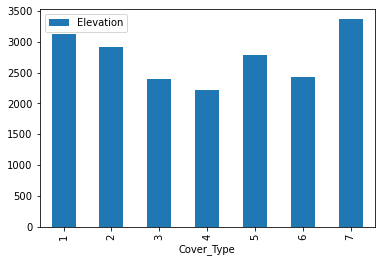

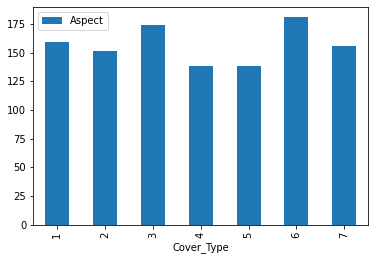

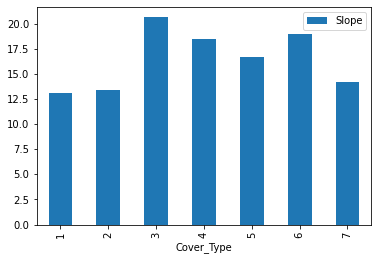

In [8]:
# Crosstab different variables by cover type to find vars useful for predicting
group_train_df = train_df.groupby('Cover_Type', as_index=False)

group_train_df['Elevation'].mean().plot.bar(x = "Cover_Type", y="Elevation")
group_train_df['Aspect'].mean().plot.bar(x = "Cover_Type", y="Aspect")
group_train_df['Slope'].mean().plot.bar(x = "Cover_Type", y="Slope")

In [19]:
# TODO: 
# Add cover type labels
# Summarize these in table instead of columns

train_df.value_counts(subset = ["Cover_Type", "Wilderness_Area"], normalize = True)

Cover_Type  Wilderness_Area 
4           Wilderness_Area4    0.142857
7           Wilderness_Area3    0.090146
5           Wilderness_Area3    0.086243
3           Wilderness_Area4    0.085780
6           Wilderness_Area4    0.079233
2           Wilderness_Area1    0.075000
1           Wilderness_Area1    0.070238
6           Wilderness_Area3    0.063624
2           Wilderness_Area3    0.062169
1           Wilderness_Area3    0.060648
3           Wilderness_Area3    0.057077
5           Wilderness_Area1    0.056614
7           Wilderness_Area1    0.036045
            Wilderness_Area2    0.016667
1           Wilderness_Area2    0.011971
2           Wilderness_Area2    0.004365
            Wilderness_Area4    0.001323
dtype: float64

In [10]:
train_df.value_counts(subset = ["Cover_Type", "Soil_Type"])

Cover_Type  Soil_Type  
6           Soil_Type10    1101
4           Soil_Type3      799
3           Soil_Type10     717
7           Soil_Type38     641
            Soil_Type39     575
                           ... 
6           Soil_Type34       2
2           Soil_Type8        1
            Soil_Type35       1
1           Soil_Type9        1
2           Soil_Type25       1
Length: 139, dtype: int64